<a href="https://colab.research.google.com/github/stephsallum/astr21/blob/main/sections9to11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from astropy.io import fits

In [2]:
!wget https://github.com/stephsallum/astr21/raw/refs/heads/main/secs9to11_data.zip
!unzip secs9to11_data.zip

--2025-03-12 00:28:47--  https://github.com/stephsallum/astr21/raw/refs/heads/main/secs9to11_data.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/stephsallum/astr21/refs/heads/main/secs9to11_data.zip [following]
--2025-03-12 00:28:48--  https://raw.githubusercontent.com/stephsallum/astr21/refs/heads/main/secs9to11_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97866 (96K) [application/zip]
Saving to: ‘secs9to11_data.zip’

secs9to11_data.zip  100%[===================>]  95.57K  --.-KB/s    in 0.02s   

2025-03-12 00:28:48 (3.77 MB/s) - ‘secs9to11_data.zip’ saved [97866/97866]

Archi

In [3]:
Agalaxy_list = np.loadtxt('secs9to11_data/Galaxy+spectra+and+distances.csv',delimiter=',',dtype=str)

In [35]:
df = pd.read_csv('secs9to11_data/Galaxy+spectra+and+distances.csv')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df['Velocity v (km/s)'] = 'None'

In [36]:
df

,Galaxy name,Redshift Independent Distance,Distance (Mpc),Spectral FITS,Velocity v (km/s)
0,NGC 99,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,29.100,https://skyserver.sdss.org/dr12/en/tools/explo...,None
1,NGC 2713,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,61.344,https://skyserver.sdss.org/dr12/en/tools/explo...,None
2,NGC 3440,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,40.533,https://skyserver.sdss.org/dr12/en/tools/explo...,None
3,NGC 7108,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,92.950,https://skyserver.sdss.org/dr12/en/tools/explo...,None
4,NGC 450,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,17.613,https://skyserver.sdss.org/dr12/en/tools/explo...,None
5,NGC 5750,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,30.086,https://skyserver.sdss.org/dr12/en/tools/explo...,None
6,NGC 5719,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,26.118,https://skyserver.sdss.org/dr12/en/tools/explo...,None
7,[BKD2008] WR 52,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,13.989,https://skyserver.sdss.org/dr12/en/tools/explo...,None
8,NGC 5334,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,33.320,https://skyserver.sdss.org/dr12/en/tools/explo...,None
9,NGC 5496,https://ned.ipac.caltech.edu/cgi-bin/nDistance...,21.887,https://skyserver.sdss.org/dr12/en/tools/explo...,None


In [5]:
c = 299792 #speed of light in km/s

# Graph the spectra of galaxies and find their emission lines

In [8]:
def gauss(x, A, mu, sigma, c):                                      # defining the Gaussian function that we'll fit over the data
    return (A * np.exp(-(x - mu)**2 / (2 * sigma**2))) + c          # the Gaussian is modified with a "co"

In [9]:
def get_redshift(lamo, lame):                    # writing the redshift function
    return (lamo-lame)/lame                      # lamo = observed wavelength, lame = emitted wavelength

def recessional_velocity(z):                     # writing the recessional velocity function
    v = z*c                                      # z = redshift, c = speed of light
    return v

ColDefs(
    name = 'flux'; format = 'E'
    name = 'loglam'; format = 'E'
    name = 'ivar'; format = 'E'
    name = 'and_mask'; format = 'J'
    name = 'or_mask'; format = 'J'
    name = 'wdisp'; format = 'E'
    name = 'sky'; format = 'E'
    name = 'model'; format = 'E'
)


Text(0, 0.5, 'flux')

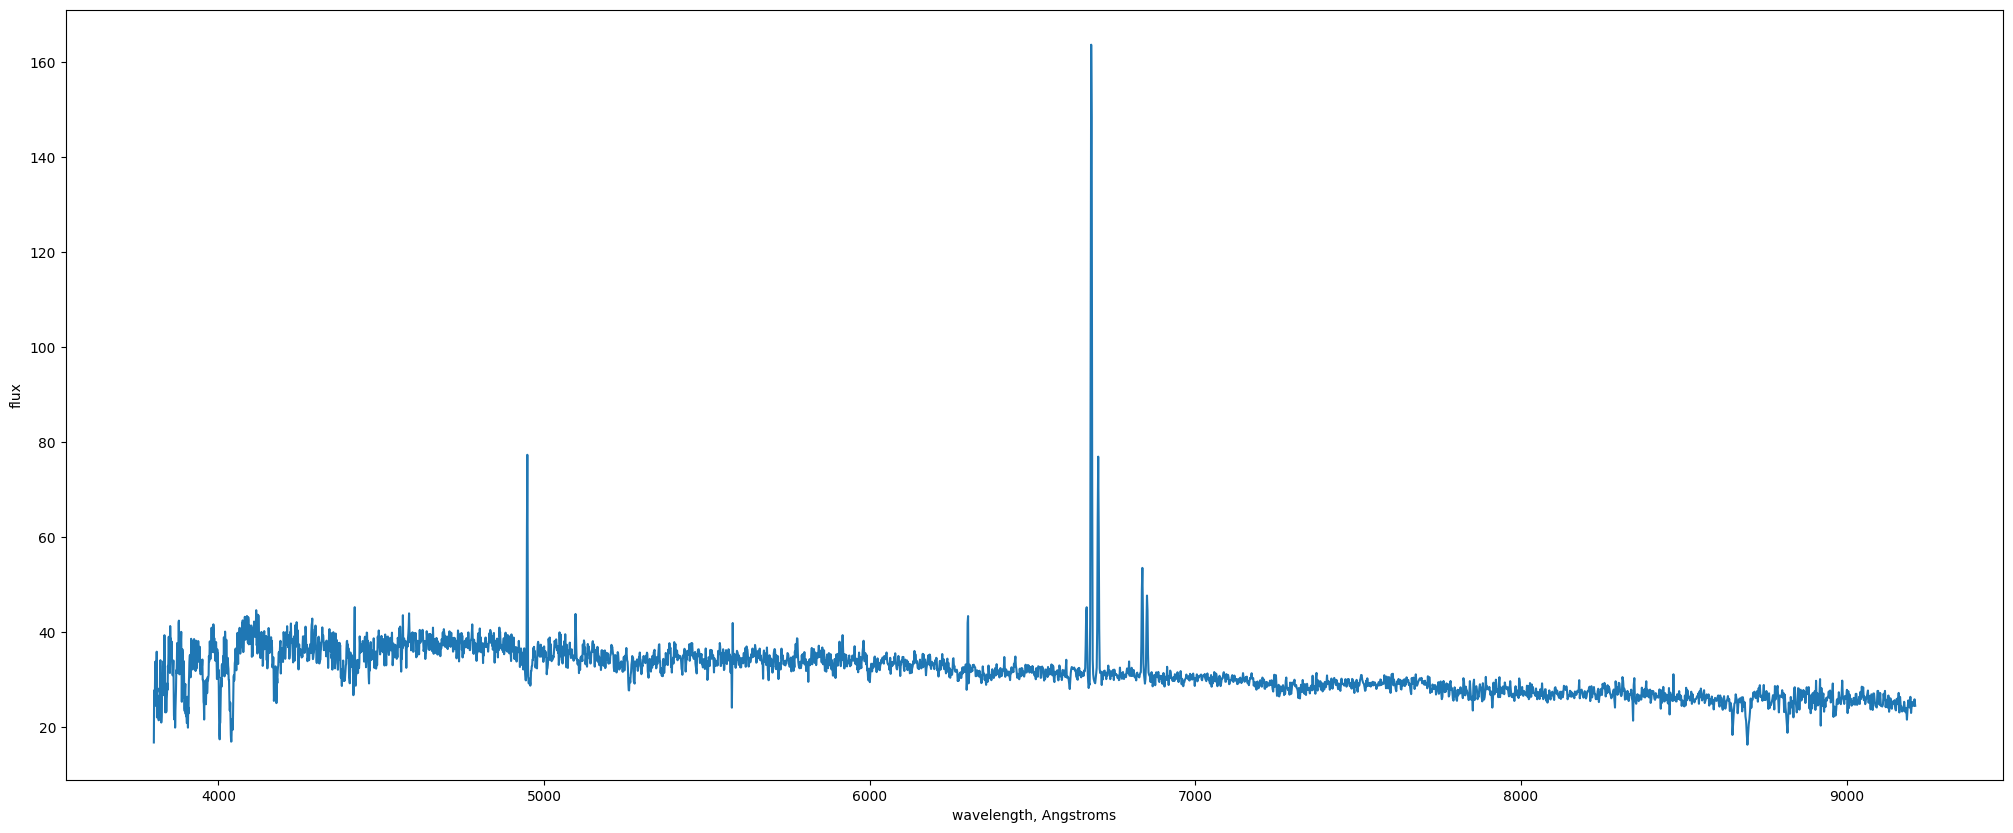

In [11]:
from astropy.io import fits         # this is the tool we'll use to analyze FITS data
hdul = fits.open('secs9to11_data/NGC99.fits')      # hdul = Header Data Unit list
print(hdul[1].columns)              # checking what the header data looks like

                                         # now we can create lists from the data in the FITS file
spec = hdul[1].data['flux']              # let's call flux "spec(trum)"...
waves = 10**hdul[1].data['loglam']       # ...and loglam "waves" (raising everything to the power of 10)

fig = plt.figure()                # create a new plot figure
fig.set_size_inches(25,10)        # make the plot wider, to fit screen


plt.plot(waves, spec)             # plot wavelengths and spectral output
plt.xlabel("wavelength, Angstroms")
plt.ylabel("flux")

Text(0, 0.5, 'flux')

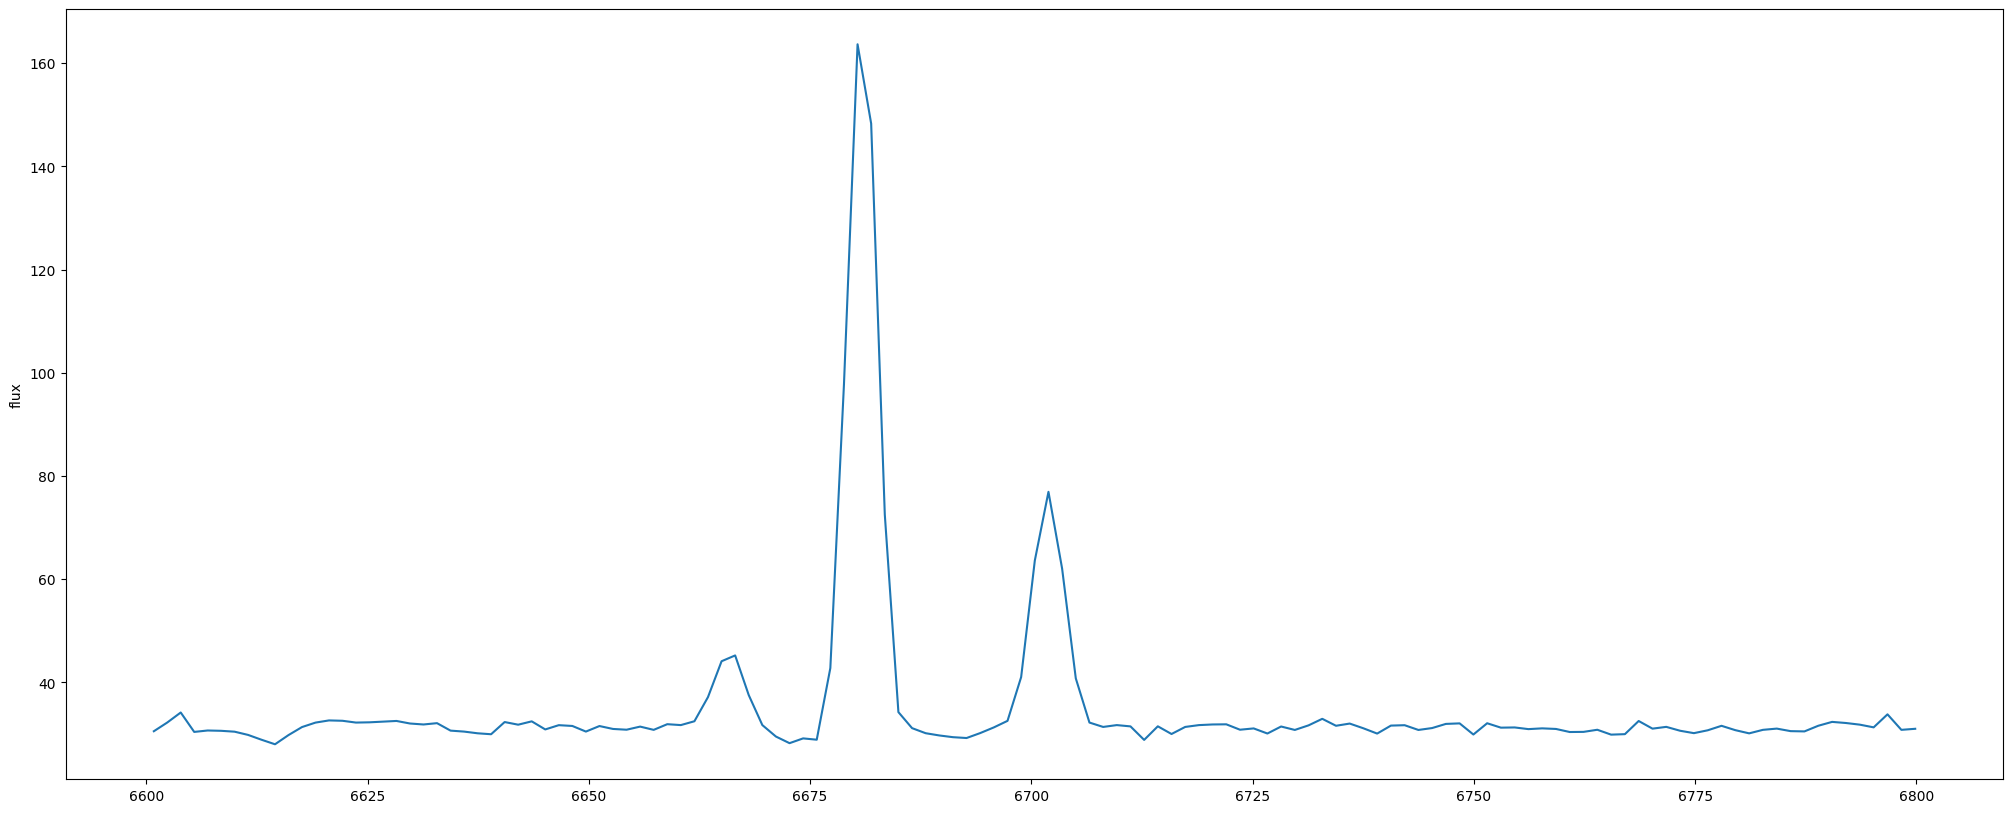

In [13]:
x_min = 6600
x_max = 6800

mask = (waves >= x_min) & (waves <= x_max)
waves2 = waves[mask]
spec2 = spec[mask]


fig = plt.figure()                       # create a new figure
fig.set_size_inches(25,10)               # make it 25x10, like above


plt.plot(waves2, spec2)                    # plot the same thing, but in the next line, we'll crop it
plt.ylabel("flux")

Fitted Parameters:
Amplitude: 139.95641617301686
Mean: 6680.8738245085
Standard Deviation: 1.6199143174600907
Continuum Level: 32.441683251238


Text(0.5, 1.0, 'Fitting Gaussian to Spectrum')

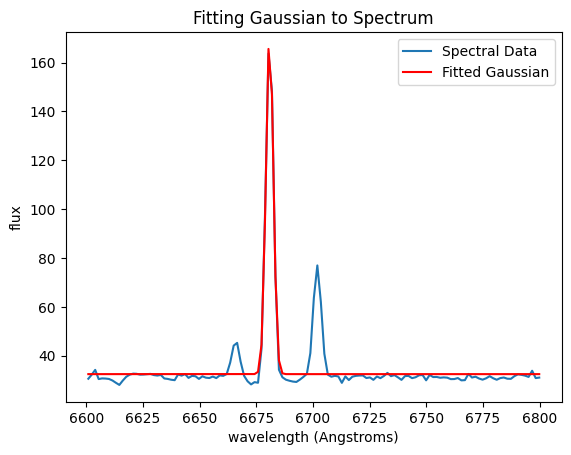

In [19]:
# Fit the Gaussian profile to the data
#initial_guess = [160, 6680, 1.5, 60]  # A, mu, sigma, c   NGC99

fit_params, _ = curve_fit(gauss, waves2, spec2, p0=initial_guess)


...

# Print the fitted parameters
print("Fitted Parameters:")
print("Amplitude:", fit_params[0])
print("Mean:", fit_params[1])
print("Standard Deviation:", fit_params[2])
print("Continuum Level:", fit_params[3])


# Plot the original data and the fitted Gaussian
plt.plot(waves2, spec2, label="Spectral Data")
plt.plot(waves2, gauss(waves2, *fit_params), color='red', label="Fitted Gaussian")
plt.legend()
plt.xlabel("wavelength (Angstroms)")
plt.ylabel("flux")
plt.title("Fitting Gaussian to Spectrum")

# Calculate velocities from redshifts

In [20]:
lamo = fit_params[1]  # Gaussian mean         # the emitted wavelength from this galaxy is the mean of the fitted function
lamr = 6563                                   # the original wavelength of this band is about 6563 angstrom
z = get_redshift(lamo, lamr)


v = recessional_velocity(z)


print("redshift:", z)
print("recessional velocity: ", v)

redshift: 0.017960357231220424
recessional velocity:  5384.3714150620335


In [32]:
df.loc[0,'Velocity v (km/s)'] = v

# Plot velocity against distance and fit a line to the data

ValueError: could not convert string to float: 'None'

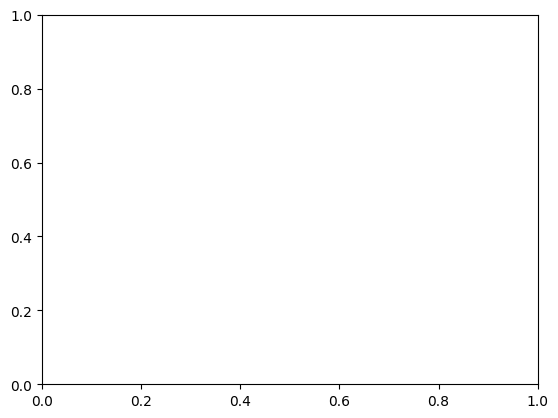

In [34]:
x = df['Distance (Mpc)'].to_numpy()
y = df['Velocity v (km/s)'].to_numpy()


plt.scatter(x,y)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")

In [ ]:
a, b = np.polyfit(x, y, 1)
plt.plot(x, a*x+b)
print("Slope = ", a, "km/s/Mpc")